In [ ]:
#import necessary libraries
!pip install qiskit
!pip install qiskit_finance
import qiskit
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import *
from qiskit.circuit.library import TwoLocal, RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance import QiskitFinanceError
from qiskit_finance.applications.optimization import *
from qiskit_finance.data_providers import *
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning
warnings.simplefilter("ignore",SymPyDeprecationWarning)
from datetime import datetime

     |████████████████████████████████| 6.1 MB 4.6 MB/s 
     |████████████████████████████████| 17.9 MB 112 kB/s 
     |████████████████████████████████| 237 kB 68.0 MB/s 
     |████████████████████████████████| 207 kB 55.5 MB/s 
     |████████████████████████████████| 2.1 MB 32.8 MB/s 
     |████████████████████████████████| 634 kB 53.5 MB/s 
     |████████████████████████████████| 1.4 MB 53.9 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 943 kB 69.3 MB/s 
     |████████████████████████████████| 3.5 MB 45.3 MB/s 
     |████████████████████████████████| 6.3 MB 19.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.32.0-py3-none-any.whl size=11773 sha256=d222af5a2e65ea5050722842bd451a81714f5c06f47d4991c3e9673ed42df10d
  Stored in directory: /root/.cache/pip/wheels/95/84/c4/6a084a33c1909266fca66eed2303c3883e03f33c905b1

In [ ]:

stocks_2 = ['AMZN', 'SPY', 'BAC', 'CVX']
start_date = datetime(2013, 1, 1)
end_date = datetime(2021, 11, 1)
data_2 = YahooDataProvider(
    tickers = stocks_2,
    start = start_date,
    end = end_date
)
data_2.run()

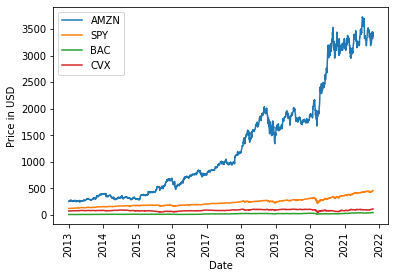

In [ ]:
for (count, s) in enumerate(data_2._tickers):
    plt.plot(data_2._data[count], label = s)
    plt.legend()
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
plt.show()

In [ ]:
mu_2 = data_2.get_period_return_mean_vector()
sigma_2 = data_2.get_period_return_covariance_matrix()
print(mu_2)
print(sigma_2)

[0.00133714 0.00064423 0.00086763 0.00034417]
[[3.59587528e-04 1.09891351e-04 1.04981668e-04 7.57020220e-05]
 [1.09891351e-04 1.07466840e-04 1.45562086e-04 1.26874651e-04]
 [1.04981668e-04 1.45562086e-04 3.73163645e-04 2.11237633e-04]
 [7.57020220e-05 1.26874651e-04 2.11237633e-04 3.23203045e-04]]


In [ ]:
rf = 0.3 
asset_budget = 4
seed = 123

In [ ]:
portfolio2 = PortfolioOptimization(expected_returns = mu_2, 
                                  covariances = sigma_2, 
                                  risk_factor = rf, 
                                  budget = asset_budget, 
                                  bounds = [(0,4), (0,4), (0,4), (0,4)])
qp_2 = portfolio2.to_quadratic_program()

In [ ]:
optimizer = SLSQP(maxiter = 1000)
backend = Aer.get_backend('statevector_simulator')
algorithm_globals.random_seed = 1234
quantum_instance = QuantumInstance(backend=backend, seed_simulator = seed, seed_transpiler = seed)
ansatz = RealAmplitudes(3, reps=3)

vqe = VQE(ansatz, optimizer=SLSQP(), quantum_instance = quantum_instance)

vqe_mineigenopt = MinimumEigenOptimizer(vqe)
result = vqe_mineigenopt.solve(qp_2)
print(result)


optimal function value: -0.0027621277571837884
optimal value: [1. 1. 2. 0.]
status: SUCCESS
